In [3]:
%matplotlib inline


# Comparison of Calibration of Classifiers


Well calibrated classifiers are probabilistic classifiers for which the output
of the predict_proba method can be directly interpreted as a confidence level.
For instance a well calibrated (binary) classifier should classify the samples
such that among the samples to which it gave a predict_proba value close to
0.8, approx. 80% actually belong to the positive class.

LogisticRegression returns well calibrated predictions as it directly
optimizes log-loss. In contrast, the other methods return biased probabilities,
with different biases per method:

* Support Vector Classification (SVC) shows an even more sigmoid curve as
  the  RandomForestClassifier, which is typical for maximum-margin methods
  (compare Niculescu-Mizil and Caruana [1]), which focus on hard samples
  that are close to the decision boundary (the support vectors).

.. topic:: References:

    .. [1] Predicting Good Probabilities with Supervised Learning,
          A. Niculescu-Mizil & R. Caruana, ICML 2005



Automatically created module for IPython interactive environment


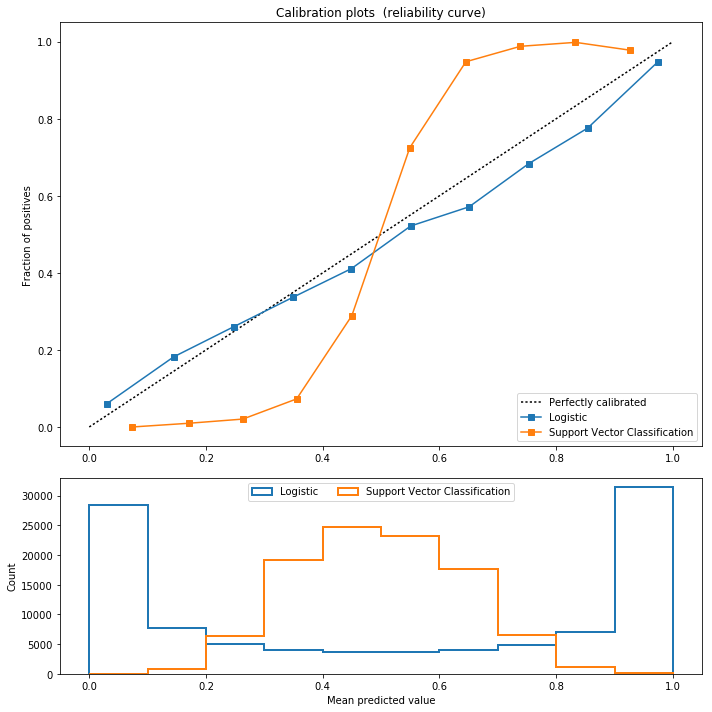

In [4]:
print(__doc__)

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Create classifiers
lr = LogisticRegression()
svc = LinearSVC(C=1.0)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (svc, 'Support Vector Classification')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()